In [1]:
project_root_path = '/home/bob/projects/Web3HackerNetwork'

In [2]:
import sys

bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [17]:
# this is the other way to handle imports, if you want the code visible:
# %load /home/bob/projects/Web3HackerNetwork/sandbox/python/bob/commit_stat_engineering.py

In [18]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [14]:
first = True
for stat in [stat for stat in all_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['jsFiles'] > 0]:
    if first:
        print(json.dumps(stat, indent=2))
        first = False
    else: break

{
  "commit": "5629c4b1eae0d9db3dd25e5ada2d91393005a3d0",
  "totalFiles": 851,
  "binFiles": 62,
  "textFiles": 789,
  "binBytes": 7329844,
  "textLines": 402917,
  "totalBytes": 19417354,
  "pctBinBytes": 37.74,
  "pctTextBytes": 62.25,
  "jsFiles": 114,
  "jsLines": 9928,
  "pctJsFiles": 13.39,
  "pctJsLines": 2.46,
  "pctJsBytes": 1.53,
  "rustFiles": 209,
  "rustLines": 8440,
  "pctRustFiles": 24.55,
  "pctRustLines": 2.09,
  "pctRustBytes": 1.3,
  "markdownFiles": 36,
  "markdownLines": 5858,
  "pctMarkdownFiles": 4.23,
  "pctMarkdownLines": 1.45,
  "pctMarkdownBytes": 0.9,
  "jsonFiles": 141,
  "jsonLines": 369338,
  "pctJsonFiles": 16.56,
  "pctJsonLines": 91.66,
  "pctJsonBytes": 57.06,
  "imgFiles": 48,
  "imgBytes": 7160304,
  "imgFilePct": 5.64,
  "imgBytePct": 36.87,
  "lockFiles": 0,
  "lockLines": 0,
  "lockFilePct": 0,
  "lockLinePct": 0,
  "lockBytePct": 0,
  "yarnFiles": 3,
  "yarnLines": 233,
  "yarnFilePct": 0.35,
  "yarnLinePct": 0.05,
  "yarnBytePct": 0.03,
  "noex

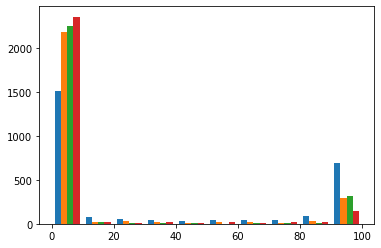

In [5]:
import matplotlib.pyplot as plt
import numpy as np

pct_rust_array = [stats['pctRustBytes'] for stats in all_stats]
pct_js_array = [stats['pctJsBytes'] for stats in all_stats]
pct_markdown_array = [stats['pctMarkdownBytes'] for stats in all_stats]
pct_json_array = [stats['pctJsonBytes'] for stats in all_stats]

plt.hist([np.array(pct_rust_array),
          np.array(pct_js_array),
          np.array(pct_markdown_array),
          np.array(pct_json_array)], 10)
plt.show()


### finding bulk commits
scatter plot of various against totalBytes

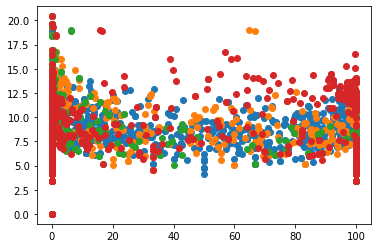

In [6]:
import matplotlib.pyplot as plt
import numpy as np

total_bytes_array = [np.log1p(stats['totalBytes']) for stats in all_stats]
plt.scatter(pct_rust_array, total_bytes_array)
plt.scatter(pct_js_array, total_bytes_array)
plt.scatter(pct_markdown_array, total_bytes_array)
plt.scatter(pct_json_array, total_bytes_array)
plt.show()

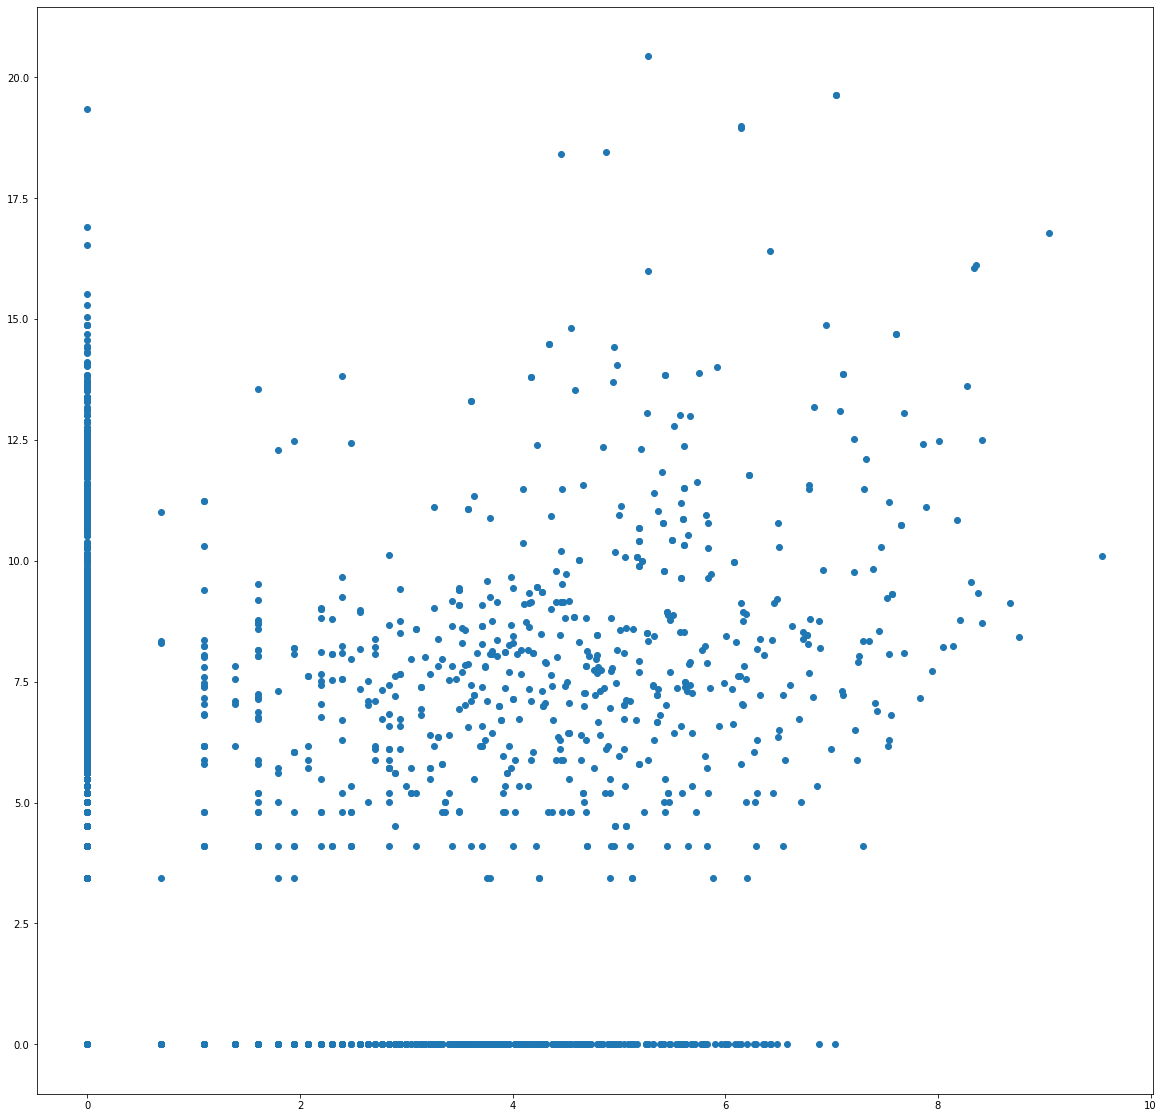

In [7]:
net_bytes_array = [np.log1p(stats['totalBytes'] - (30 * stats['rustLines'])) for stats in all_stats]

rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['jsLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(1, 1, figsize=(20,20))
axs.scatter(rust_array, net_bytes_array)
#plt.scatter(js_array, total_bytes_array)
#plt.scatter(markdown_array, total_bytes_array)
#plt.scatter(json_array, total_bytes_array)
plt.show()

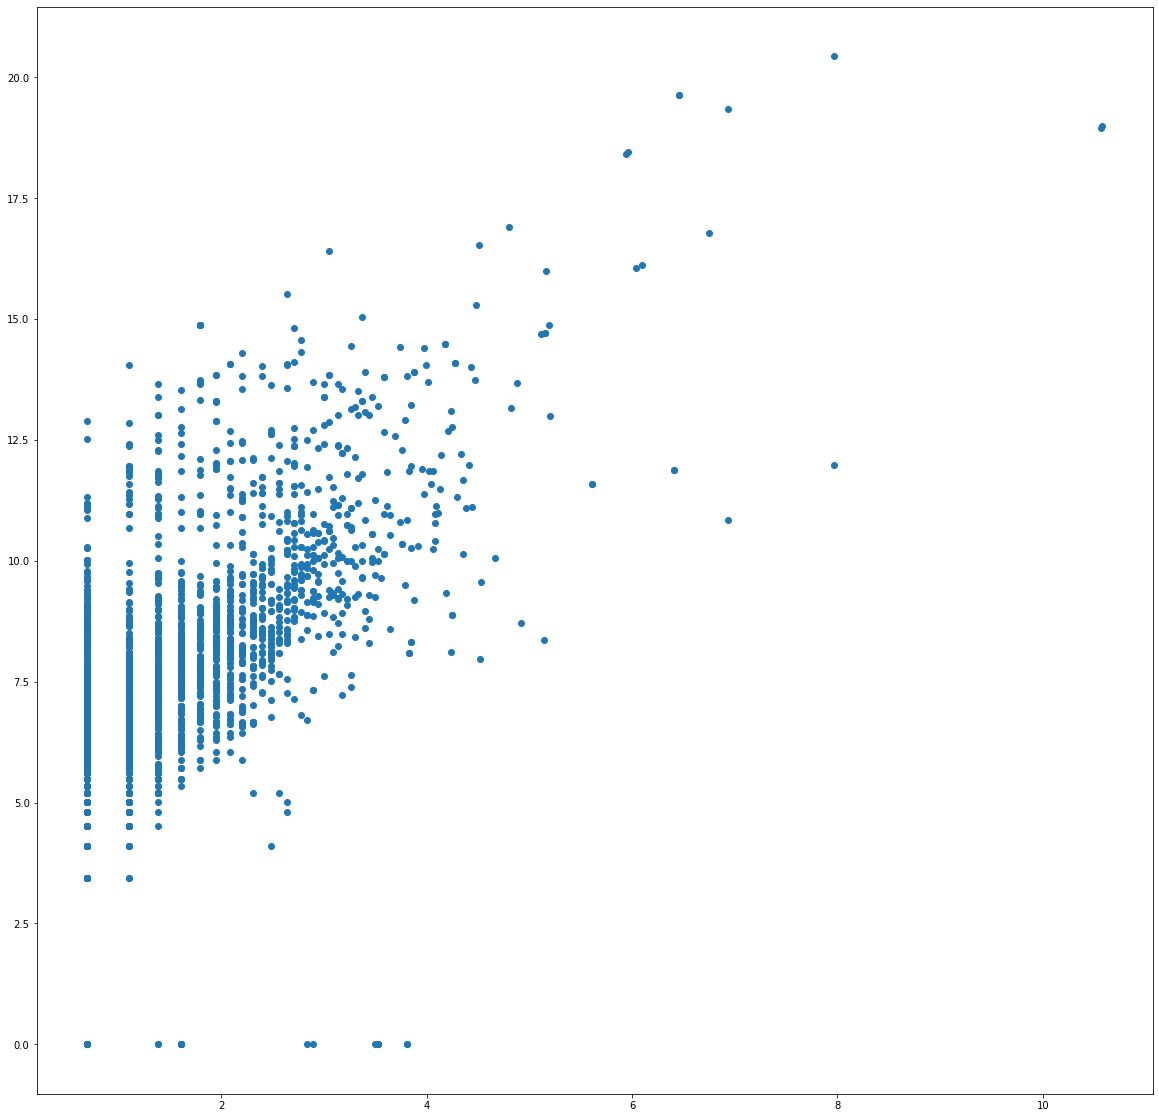

In [8]:
#net_bytes_array = [np.log1p(stats['totalBytes'] - (30 * stats['rustLines'])) for stats in all_stats]
net_bytes_array = [np.log1p(stats['totalBytes']) for stats in all_stats]
total_files = [np.log1p(stats['totalFiles']) for stats in all_stats]
line_bytes_array = [np.log1p((stats['rustLines']+1)*(stats['jsLines']+1)) for stats in all_stats]

rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['jsLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(1, 1, figsize=(20,20))
axs.scatter(total_files, net_bytes_array)
#plt.scatter(js_array, total_bytes_array)
#plt.scatter(markdown_array, total_bytes_array)
#plt.scatter(json_array, total_bytes_array)
plt.show()

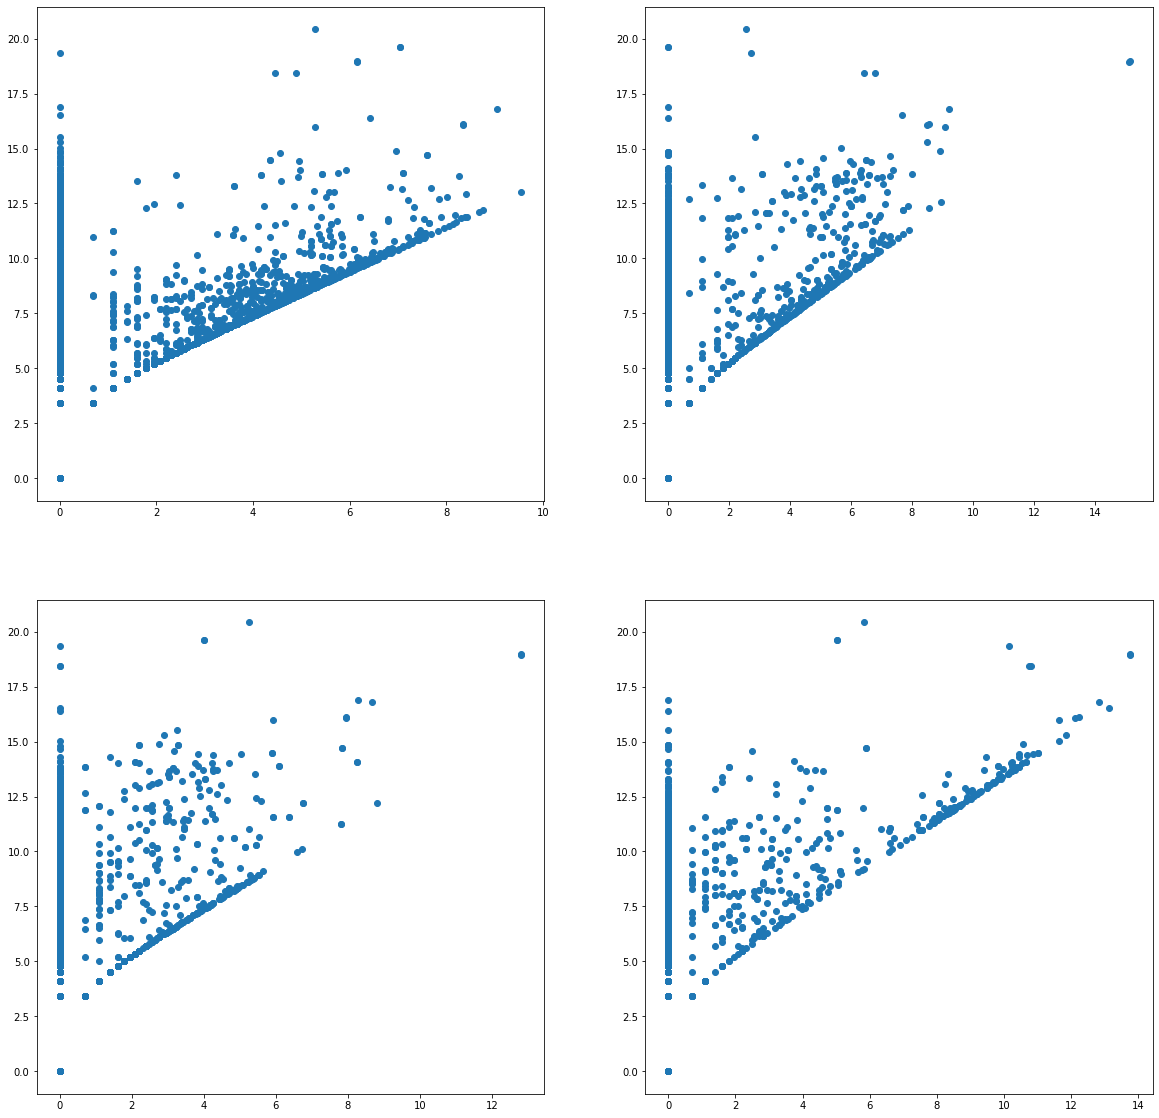

In [9]:
rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['jsLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0,0].scatter(rust_array, total_bytes_array)
axs[0,1].scatter(js_array, total_bytes_array)
axs[1,0].scatter(markdown_array, total_bytes_array)
axs[1,1].scatter(json_array, total_bytes_array)
plt.show()

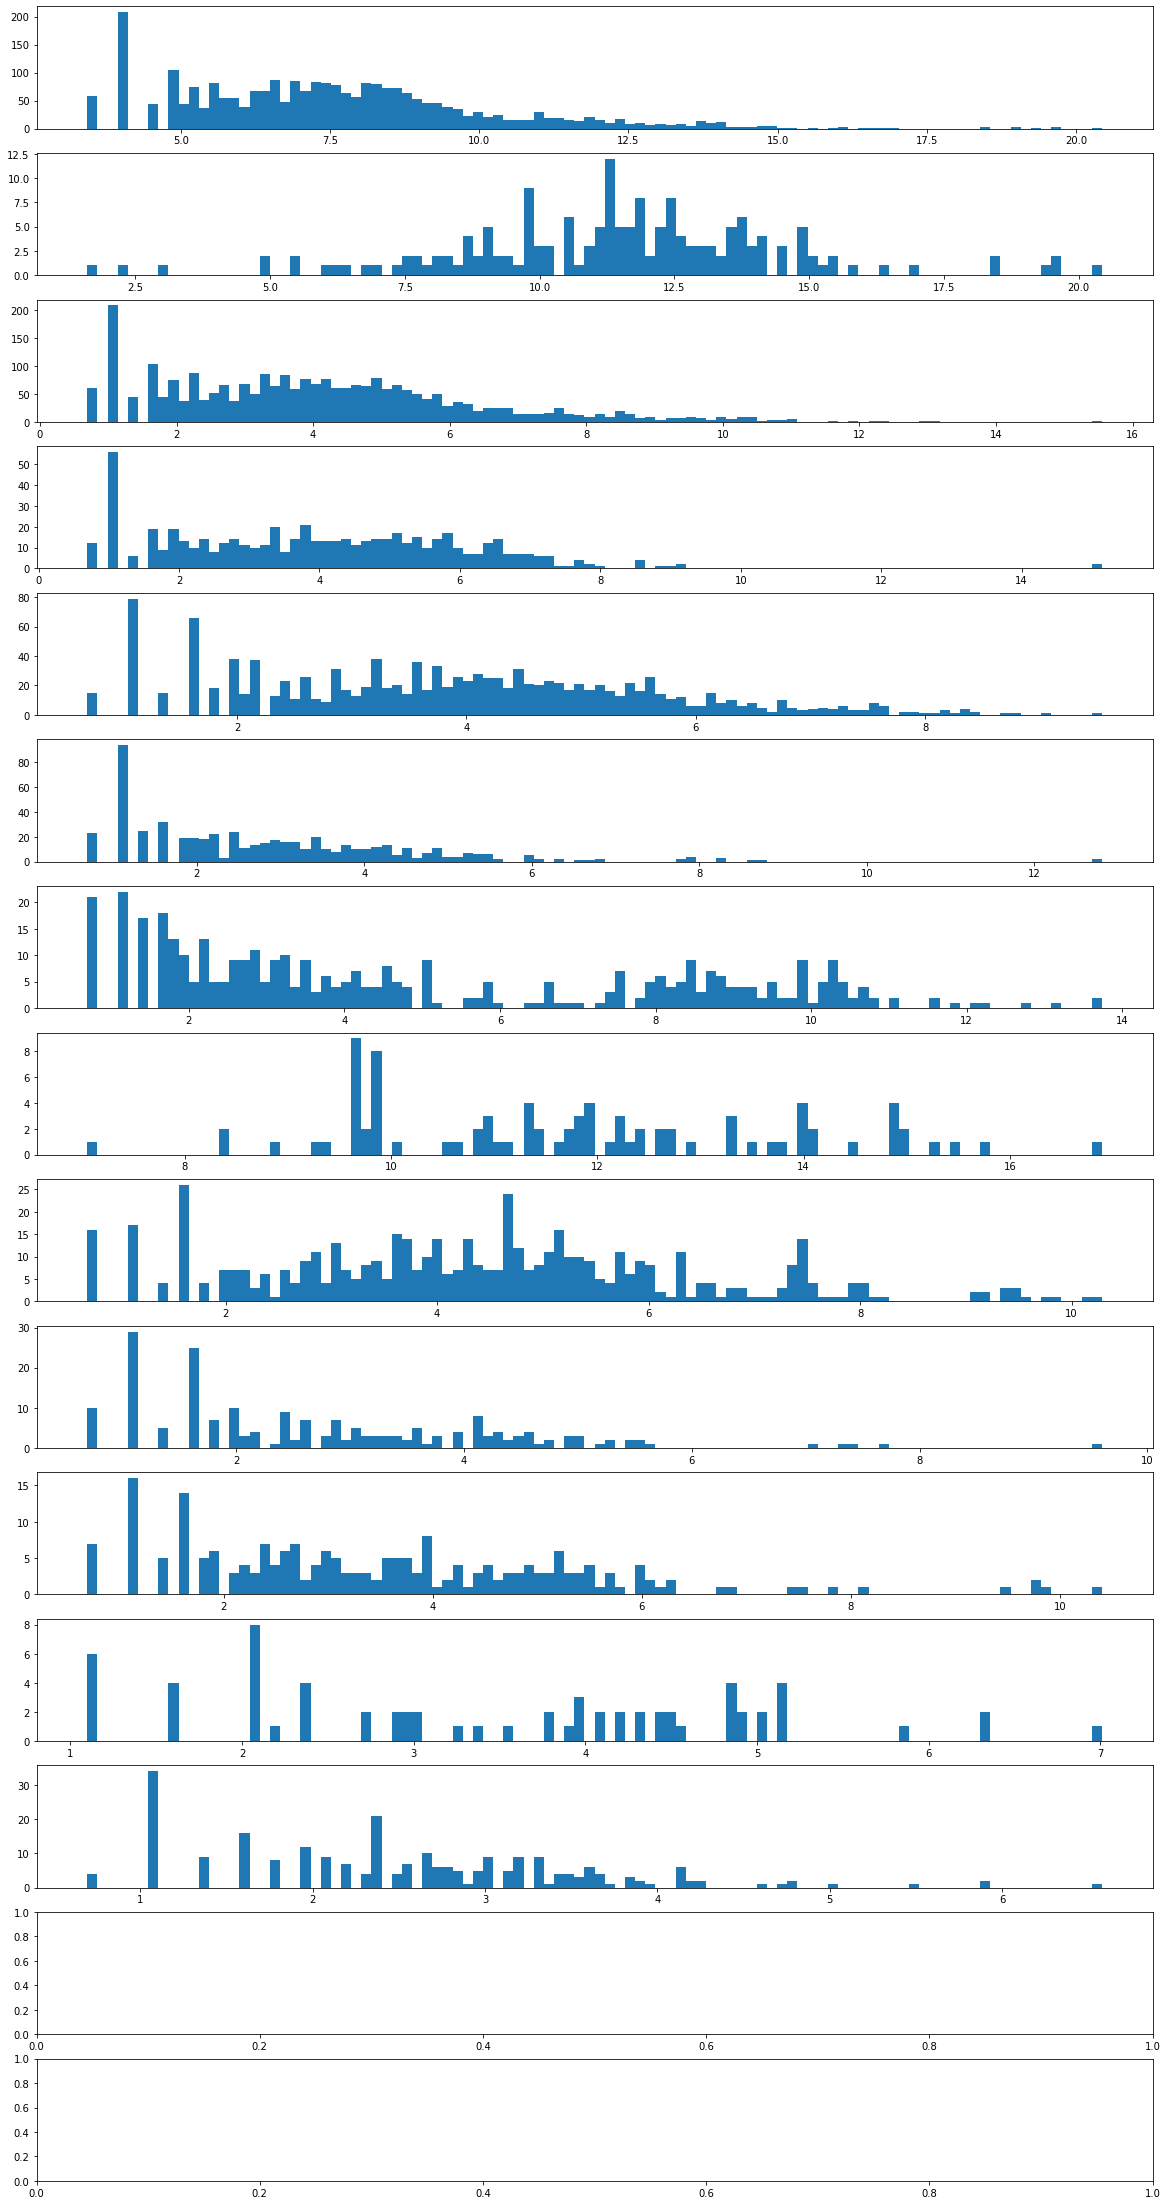

In [30]:
def log1p_stat_array(stats_set, stat_name):
    return [np.log1p(stats[stat_name]) for stats in stats_set if stats[stat_name] > 0]

def hist_me_with_your_best_shot(axis, stats_set, stat_name):
    axis.hist(log1p_stat_array(stats_set, stat_name), 100)

bytes_array = log1p_stat_array(all_stats, 'totalBytes')
binbytes_array = log1p_stat_array(all_stats, 'binBytes')
textlines_array = log1p_stat_array(all_stats, 'textLines')
jslines_array = log1p_stat_array(all_stats, 'jsLines')
rustlines_array = log1p_stat_array(all_stats, 'rustLines')
markdownlines_array = log1p_stat_array(all_stats, 'markdownLines')
jsonlines_array = log1p_stat_array(all_stats, 'jsonLines')

fig, axs = plt.subplots(15, 1, figsize=(20,40))
'''
axs[0].hist(bytes_array, 100) # probably drop this, fully dependent
axs[1].hist(binbytes_array, 100)
axs[2].hist(textlines_array, 100) # maybe drop this, largely dependent
axs[3].hist(jslines_array, 100)
axs[4].hist(rustlines_array, 100)
axs[5].hist(markdownlines_array, 100)
axs[6].hist(jsonlines_array, 100)
'''
hist_me_with_your_best_shot(axs[0], all_stats, 'totalBytes')
hist_me_with_your_best_shot(axs[1], all_stats, 'binBytes')
hist_me_with_your_best_shot(axs[2], all_stats, 'textLines')
hist_me_with_your_best_shot(axs[3], all_stats, 'jsLines')
hist_me_with_your_best_shot(axs[4], all_stats, 'rustLines')
hist_me_with_your_best_shot(axs[5], all_stats, 'markdownLines')
hist_me_with_your_best_shot(axs[6], all_stats, 'jsonLines')
hist_me_with_your_best_shot(axs[7], all_stats, 'imgBytes')
hist_me_with_your_best_shot(axs[8], all_stats, 'lockLines')
hist_me_with_your_best_shot(axs[9], all_stats, 'yarnLines')
hist_me_with_your_best_shot(axs[10], all_stats, 'htmlLines')
hist_me_with_your_best_shot(axs[11], all_stats, 'clojureLines')
hist_me_with_your_best_shot(axs[12], all_stats, 'shellLines')
plt.show()

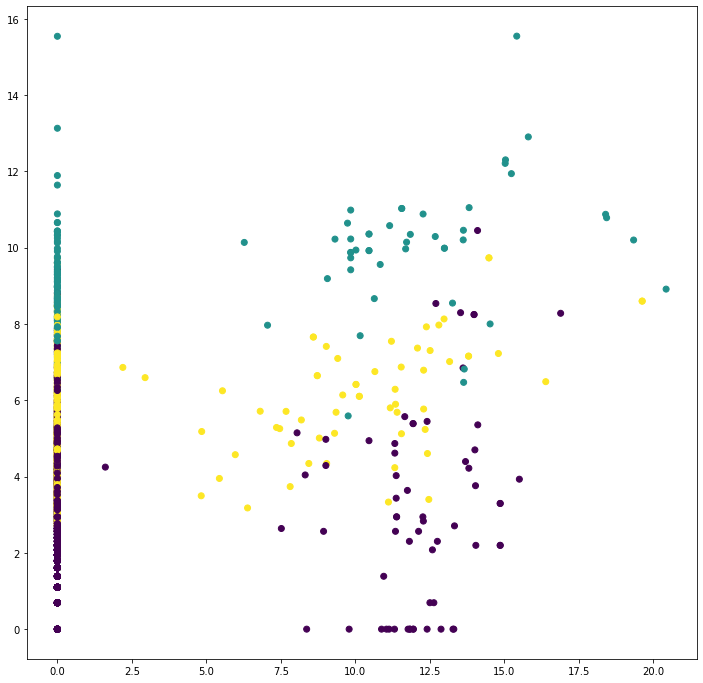

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12,12))

X = [[np.log1p(stat['jsLines']),
      np.log1p(stat['rustLines']),
      np.log1p(stat['markdownLines']),
      np.log1p(stat['jsonLines']),
      #np.log1p(stat['imgBytes']),
      np.log1p(stat['lockLines']),
      np.log1p(stat['yarnLines']),
      np.log1p(stat['htmlLines'])] for stat in all_stats]
#print(X)

random_state = 8675309
y_pred = KMeans(n_clusters=3, random_state = random_state).fit_predict(X)

x_values = [np.log1p(stat['binBytes']) for stat in all_stats]
y_values = [np.log1p(stat['textLines']) for stat in all_stats]

plt.scatter(x_values, y_values, c=y_pred)
plt.show()


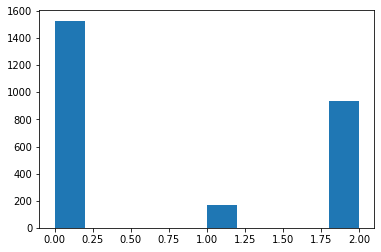

In [46]:
plt.hist(y_pred)
plt.show()

In [53]:
samples = 0
for i in range(0,1000):
    if (y_pred[i] == 0):
        print(str(y_pred[i]) + ": " + str(X[i]))
        samples += 1
    if samples > 40: break
print()
samples = 0
for i in range(0,1000):
    if (y_pred[i] == 1):
        print(str(y_pred[i]) + ": " + str(X[i]))
        samples += 1
    if samples > 40: break
print()
samples = 0
for i in range(0,1000):
    if (y_pred[i] == 2):
        print(str(y_pred[i]) + ": " + str(X[i]))
        samples += 1
    if samples > 40: break


0: [3.295836866004329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 3.1354942159291497, 0.0, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 0.0, 1.0986122886681096, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 5.303304908059076, 0.0, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 0.0, 0.6931471805599453, 0.0, 0.0, 0.0]
0: [1.6094379124341003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 2.302585092994046, 4.174387269895637, 0.0, 0.0, 0.0]
0: [2.995732273553991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [4.61512051684126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [2.772588722239781, 0.0, 0.0, 0.6931471805599453, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 2.9444389791664403, 0.0, 0.0, 0.0, 0.0]
0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [7.88532923927319, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [3.8066624897703196, 0.0, 0.0, 0.6931471805599453, 0.0, 0.0, 0.0]
0: [1.0986122886681096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [1.3862943611198906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0: [4.77912349311153, 0.0, 3.295836866004329, 1.3862943611198906, 0.0, 0.0, 0.0]
0: [4.343805421853684, 0.0, 0.0, 0.

In [36]:
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#print(X)

In [ ]:

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()